# Basic Probability Models and Sampling in Python

This lesson introduces the basic concepts of sampling and computing with probability models in Python. 

Numpy provides a rich variety of functions and models that will help us in developing our computing tools.

Let's start by generating samples from an univariate Gaussian distribution with given mean $\mu$ and standard deviation $\sigma$.

In [1]:
import numpy as np

mu = 100

sigma = 20

samples = 300

data = np.random.normal(mu, sigma, samples)

Having generated the sample, we can inspect the properties of the data to get more information about our distribution.

The first question we would like to ask is what is the ratio of our data being greather than a certain value $L$. This can be approximated by counting: 

In [2]:
L = 120
prob = float(np.sum(data>120))/samples

print("The ratio of values being greater than " + str(L) + " is: p(x>"+str(L)+") = " + str(prob))

The ratio of values being greater than 120 is: p(x>120) = 0.19


Similarly, we can compute the ratio of samples $L_1<x<L_2$:

In [4]:
L1 = 100
L2 = 120

prob = float(np.sum((data>100) & (data<120)))/samples

print("The ratio is: p("+str(L1)+"<x<"+str(L2)+") = " + str(prob))

The ratio is: p(100<x<120) = 0.25333333333333335


Summary statistics can be simply computed as:

In [5]:
mean = np.sum(data)/samples
std = np.sqrt(np.sum((data-mean)**2)/samples)

print("Sample mean: " + str(mean) + "\nSample std: " + str(std))

print("\nNumpy functions: \n" + "mean: " + str(np.mean(data)) + " - std: "+ str(np.std(data)))

Sample mean: 98.84730596618091
Sample std: 20.476892717522773

Numpy functions: 
mean: 98.84730596618091 - std: 20.476892717522773


$\mathbf{Exercise:}$ Compute the median of the sample.

An important way of visualizing a distribution is through an histogram plot. A histogram plot is created by discretizing the domain of the distribution in a certain number of bins, and by computing the number of realization of the distribution falling within each bin. 

In [12]:
first_edge, last_edge = data.min(), data.max()
n_equal_bins = 10
bin_edges = np.linspace(start=first_edge, stop=last_edge,num=n_equal_bins + 1, endpoint=True)

# All but the last (righthand-most) bin is half-open.
bin_height = []
for i in range(len(bin_edges)-2):
    bin_height.append(np.sum((data>=bin_edges[i]) & (data<bin_edges[i+1])))
    
# The last bin is closed on the right
bin_height.append(np.sum((data>=bin_edges[i+1]) & (data<=bin_edges[i+2])))

bin_height = np.array(bin_height)
print('\n Histogram computation')
print(bin_edges, bin_height)

# Handmade histogram
print('\n Handmade histogram plot:\n')

bin_centers = np.diff(bin_edges)/2 + bin_edges[:-1]

for i in range(n_equal_bins):
    print('{0:1f} {1}'.format(bin_centers[i], '+' * bin_height[i]))

# The same histogram can be obtained with numpy
np_bin_height,np_bin_edges = np.histogram(data)

print('\n Numpy default histogram')
print(np_bin_edges, np_bin_height)



 Histogram computation
[ 32.19743882  43.88600667  55.57457452  67.26314238  78.95171023
  90.64027808 102.32884593 114.01741379 125.70598164 137.39454949
 149.08311734] [ 1  4 14 27 60 76 42 45 22  9]

 Handmade histogram plot:

38.041723 +
49.730291 ++++
61.418858 ++++++++++++++
73.107426 +++++++++++++++++++++++++++
84.795994 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
96.484562 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
108.173130 ++++++++++++++++++++++++++++++++++++++++++
119.861698 +++++++++++++++++++++++++++++++++++++++++++++
131.550266 ++++++++++++++++++++++
143.238833 +++++++++

 Numpy default histogram
[ 32.19743882  43.88600667  55.57457452  67.26314238  78.95171023
  90.64027808 102.32884593 114.01741379 125.70598164 137.39454949
 149.08311734] [ 1  4 14 27 60 76 42 45 22  9]


The sum of the bin heights in the normalized histogram is: 1.0000000000000004


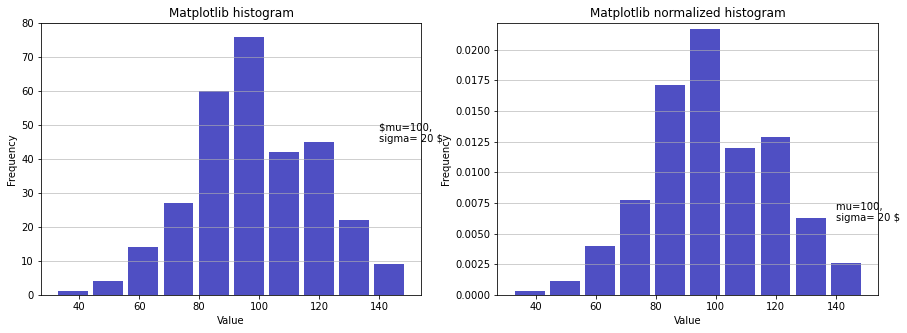

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

n, bins, patches = plt.hist(x=data, bins=10, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Matplotlib histogram')
plt.text(140, 45, r'$mu=' + str(mu) + ', \nsigma= ' + str(sigma) +' $')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(x=data, density = True, bins=10, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Matplotlib normalized histogram')
plt.text(140, 0.006, r'mu=' + str(mu) + ', \nsigma= ' + str(sigma) +' $')
maxfreq = n.max()
plt.ylim(ymax=maxfreq + 0.0005)

bin_size = bins[1]-bins[0]

print("The sum of the bin heights in the normalized histogram is: " + str(np.sum(n*bin_size)))

The probability density function (PDF) $f(x)$ of a random variable is a function quantifying the density of the variable at each point $x$ of the domain. By integrating the PDF, $\int_{a}^b f(t)\, dt$, we quantify the probability of the random variable falling within a particular range of values. 
In our case, when dealing with discrete samples of a variable, a discrete approximation of the PDF is provided by the normalization histogram. The PDF is equivalent to a continuous representation of the histogram, and can be estimated through interpolation.

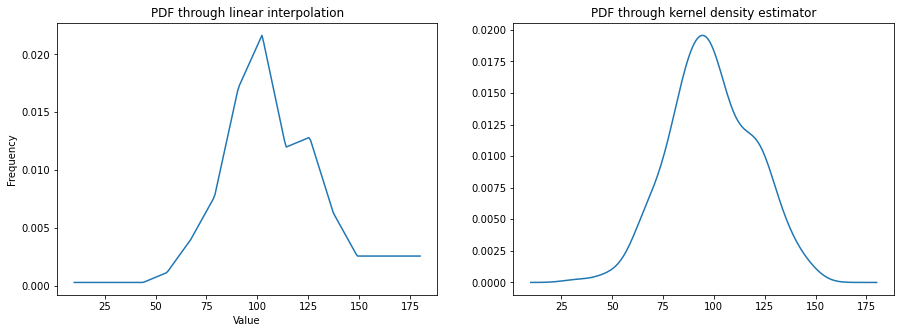

In [16]:
from scipy import stats

fine_range = np.linspace(10,180,200)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
interpolated = np.interp(fine_range,bins[1:],n)
plt.plot(fine_range, interpolated)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('PDF through linear interpolation')

plt.subplot(1, 2, 2)
gkde = stats.gaussian_kde(dataset = data)
plt.plot(fine_range, gkde.evaluate(fine_range))
plt.title('PDF through kernel density estimator')

plt.show()

$\mathbf{Exercise:}$ Plot the cumulative density function (CDF) of the sample. The CDF of $f(x)$ is defined as $F(x) = \int_{-\infty}^x f(t)\, dt$. In our discrete setting, the integral will be approximated by a sum.

## Sampling in Python

As we have seen, sampling is a fundamental operation at the basis of a great number of procedures in computer science.
In this section we will discover useful functionalities that will allow us to control sampling operations on numerical objects. 

The first important point is the concept of $seed$: a computer program can generate does provide pseudo-random numbers, that are generated starting from an initial value called, indeed, seed. Let's see how this work in practice:


In [23]:
# Setting the seed
np.random.seed(123)

# Computing random numbers
print("Ten numbers sampled from the seed 123: \n" + str(np.random.random(10)))

# Changing the seed
np.random.seed(321)
print("Ten numbers sampled from the seed 321: \n" + str(np.random.random(10)))

#Back to the initial seed
np.random.seed(123)
print("Ten numbers sampled again from the seed 123: \n" + str(np.random.random(10)))

Ten numbers sampled from the seed 123: 
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]
Ten numbers sampled from the seed 321: 
[0.88594794 0.07791236 0.97964616 0.24767146 0.75288472 0.52667564
 0.90755375 0.8840703  0.08926896 0.5173446 ]
Ten numbers sampled again from the seed 123: 
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


The concept of seed is very important for reproducibility across different experiments. Every time we set the same seed we ensure to reproduce the same set of (pseudo-)random numbers.

In addition to sampling from a theoretical distribution, such as normal or uniform, we can sample from a given array of values. This operation sets the basis of the resampling methods that we will see in the future lessons.

In [24]:
np.random.seed(10)

int_array = np.random.randint(0,50,20)

print("Here is a randomly generated sequence of 20 integers: \n" + str(int_array))

selected = np.random.choice(int_array,5)

print("Here we selected only 5 elements of the sequence: \n" + str(selected))

Here is a randomly generated sequence of 20 integers: 
[ 9 36 15  0 49 28 25 29 48 29 49  8  9  0 42 40 36 16 36 47]
Here we selected only 5 elements of the sequence: 
[ 8  8 36 48 49]


We notice however that  the number 8 was selected twice. If we want to ensure that each element is sampled only once, we need to set the option `replace=False`.

In [28]:
selected = np.random.choice(int_array,5,replace=False)

print("Here we selected 5 elements without replacement: \n" + str(selected))

Here we selected 5 elements without replacement: 
[49  8 48 29  9]


The same procedure can be applied for sampling for more complex objects, such as multidimensional arrays (tensors):

In [25]:
array2d = np.random.randint(0, 10, (8, 12))
print(array2d)

[[1 3 6 5 3 9 6 9 1 9 4 2]
 [6 7 8 8 9 2 0 6 7 8 1 7]
 [1 4 0 8 5 4 7 8 8 2 6 2]
 [8 8 6 6 5 6 0 0 6 9 1 8]
 [9 1 2 8 9 9 5 0 2 7 3 0]
 [4 2 0 3 3 1 2 5 9 0 1 0]
 [1 9 0 9 2 1 1 0 0 5 9 0]
 [4 6 6 0 2 3 3 2 6 0 5 1]]


In [30]:
print(array2d.shape[0])
print(np.random.choice(8, 4, replace=False))

line_count = np.arange(8)
print(line_count)

print(np.random.choice(line_count, 4, replace=False))

8
[0 6 2 7]
[0 1 2 3 4 5 6 7]
[2 3 0 4]


In [31]:
#Here we sample 4 rows
idx = np.random.choice(array2d.shape[0], 4)
print("Four randomly sampled rows in array2d: \n" + str(array2d[idx, :]))

#Here we sample 4 columns
idx = np.random.choice(array2d.shape[1], 4)
print("Four randomly sampled columns in array2d: \n" + str(array2d[:, idx]))


Four randomly sampled rows in array2d: 
[[0 2 3 3 2 6 0 5 1 3 6 5]
 [3 3 1 2 5 9 0 1 0 1 9 0]
 [5 1 8 0 5 9 8 5 7 8 5 8]
 [8 9 9 5 0 2 7 3 0 4 2 0]]
Four randomly sampled columns in array2d: 
[[1 1 1 8]
 [6 8 6 2]
 [1 9 1 9]
 [3 4 3 7]
 [1 1 1 0]
 [9 4 9 5]
 [5 3 5 0]
 [5 8 5 8]]


We can also randomly reshuffle the elements of an array. Be careful, the command `np.random.shuffle` reshuffles the elements along the first axis only. By default, the reshuffling is performed in place:

In [32]:
print(array2d)

np.random.shuffle(array2d)

print("Reshuffled array2d across rows: \n" + str(array2d))


[[8 9 2 0 6 7 8 1 7 1 4 0]
 [8 5 4 7 8 8 2 6 2 8 8 6]
 [6 5 6 0 0 6 9 1 8 9 1 2]
 [8 9 9 5 0 2 7 3 0 4 2 0]
 [3 3 1 2 5 9 0 1 0 1 9 0]
 [9 2 1 1 0 0 5 9 0 4 6 6]
 [0 2 3 3 2 6 0 5 1 3 6 5]
 [5 1 8 0 5 9 8 5 7 8 5 8]]
Reshuffled array2d across rows: 
[[9 2 1 1 0 0 5 9 0 4 6 6]
 [6 5 6 0 0 6 9 1 8 9 1 2]
 [0 2 3 3 2 6 0 5 1 3 6 5]
 [5 1 8 0 5 9 8 5 7 8 5 8]
 [3 3 1 2 5 9 0 1 0 1 9 0]
 [8 5 4 7 8 8 2 6 2 8 8 6]
 [8 9 9 5 0 2 7 3 0 4 2 0]
 [8 9 2 0 6 7 8 1 7 1 4 0]]


$\mathbf{Exercise.}$ How would you reshuffle array2d across columns?

$\mathbf{Exercise.}$ Write your own reshuffling routine.

## In-depth: how random variables can be generated by a computer program

$\textit{Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin.}$ (John von Neumann)

Generation or simulation of random numbers, using deterministic algorithms, is widely used by statisticians for several purposes. A large number of (pseudo-)random number generators have been studied in the past, starting from very long time ago:

``Brother Edvin (a monk), sometime between 1240 and 1250 AD, was preparing a case for the sainthood of King Olaf Haraldsson, who had been the King of Norway. There was a well documented story (that could still be false) that King Olaf and the King of Sweden needed to determine which country owned the Island the Hising. They agreed to determine this by chance. They were using normal 6-sided dice. The King of Sweden rolled two dice and got a 12. Then King Olaf rolled and got a 12 AND one of the dice broke (hence the name of the book) and he got an additional 1 for a 13. Some attributed this event to divine intervention, which strengthened his case for sainthood.’’ (https://blog.computationalcomplexity.org)

According to the story, this even motivated Brother Edvin in thinking of an algorithm to generate random numbers in a way that nobody can manipulate them. A very similar algorithm was reproposed by von Neumann in 1946 for creating the so-called middle-square method.  

Many mehtods have been proposed since them, and an overview is for example provided in wikipedia:  (https://en.wikipedia.org/wiki/List_of_random_number_generators).

In this section we will assume that we can indeed generate random numbers uniformly distributed in the interval $[0,1]$. This actually corresponds to sampling from the uniform distribution $\mathbf{U}(0,1)$. 


For the sake of illustration, we will focus on classical examples on the generation of samples from standard distributions, such as Exponential and Gaussian ones. In particular, in what follows we are going to illustrate some classical simulation techniques and of the underlying rationale.

## Exponential 

The key property that can be used to sample from the exponential distribution is that the cumulative density function (CDF) $F(X)$ of a random variable $X$ is uniformely distributed $[0,1]$. Therefore, by applying the inverse CDF $F^{-1}$ to our uniform samples we can obtain data with the same distribution of $X$.


For the exponential distribution, we can use this property to lead to a very simple generator. Since the probability density function of the exponential distribution is:

$$f(x) = \lambda\exp(-\lambda x)$$

it follows that the CDF of the exponential with parameter $\lambda$ is:

$$F(x) =  1-\exp(-\lambda x).$$

The inverse of $F$ can be easily derived:

$$F^{-1}(p) = -\frac{\log(1 - p)}{\lambda}.$$

Let's verify this empirically:

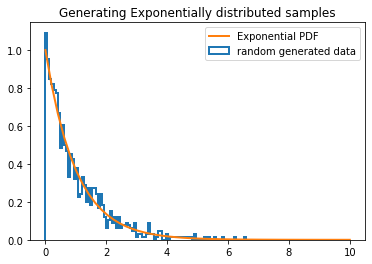

In [26]:
l = 1

unif_sample = np.random.uniform(0,1,1000)
exp_sample = -np.log(1-unif_sample)/l
plt.hist(exp_sample, histtype='step', bins=100, density=True, linewidth=2, label = 'random generated data')

def exp_pdf(x,l):
    return l*np.exp(-x*l)

x = np.linspace(0,10)
plt.plot(x, exp_pdf(x,l), linewidth=2, label = 'Exponential PDF')
plt.legend()
plt.title('Generating Exponentially distributed samples')
plt.show()




## Gaussian



For the Gaussian case, sampling through the coomputation of the inverse CDF is more complicated, as the inverse of the Gaussian CDF cannot be written in closed form. We can however rely on the several available approximations, such as the one provided by H. Shore in 1982:

$$F^{-1}(p) \simeq 5.5556\left[ 1- \left(\frac{1-p}{p}\right)^{0.1186}\right], \qquad p\geq0.5$$
$$F^{-1}(p) \simeq -5.5556\left[ 1- \left(\frac{p}{1-p}\right)^{0.1186}\right], \qquad p<0.5$$




[Haim Shore. Simple Approximations for the Inverse Cumulative Function, the Density Function and the Loss Integral of the Normal Distribution. Journal of the Royal Statistical Society. Series C (Applied Statistics)
Vol. 31, No. 2 (1982), pp. 108-114] 

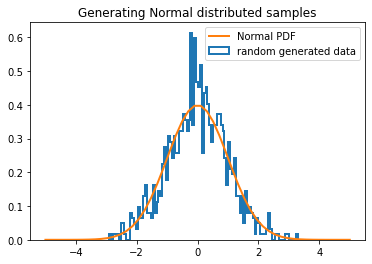

In [28]:
unif_sample = np.random.uniform(0.5,1,1000)

def inv_norm_cdf(x):
    a = x[:int(len(x)/2)]
    b = x[int(len(x)/2):]
    z_top = 5.5556 * (1 - np.power((1-a)/a,0.1186))
    z_bottom = -5.5556 * (1 - np.power((1-b)/b,0.1186))
    return np.hstack([z_top,z_bottom])


normal_sample = inv_norm_cdf(unif_sample)

plt.hist(normal_sample, histtype='step', bins=100, density=True, linewidth=2, label = 'random generated data')


def normal_pdf(x):    
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

x = np.linspace(-5,5)
plt.plot(x, normal_pdf(x), linewidth=2, label = 'Normal PDF')
plt.legend()
plt.title('Generating Normal distributed samples')

plt.show()


Sampling can be also obtained by leveraging on other properties of probability models. For example, the central limit theorem states that, for independent and identically distributed random variables $X_1, \ldots, X_n$ with mean $\mu$ and variance $\sigma^2$, their average $S_n = \frac{X_1 + \ldots + X_n}{n}$ converges in distribution to the Gaussian according to the following relationhsip:  

$$ \sqrt{n}(S_n - \mu) \rightarrow \mathcal{N}(0,\sigma^2)$$

We can use this relationship to generate standard Gaussian sample from a independent samples from a uniform distribution $\mathbf{U}(0,1)$. Let $X_1, \ldots, X_{12}$ be 12 iid samples from $\mathbf{U}(0,1)$, and $S_{12} = \frac{X_1 + \ldots + X_{12}}{12}$. We know that the mean of $\mathbf{U}(0,1)$ is $\mu = \frac{1}{2}$, while the variance is $\frac{1}{12}$. Therefore, the above relationship writes as:

$$ \sqrt{12}(S_{12} - \frac{1}{2}) \rightarrow \mathcal{N}(0,\frac{1}{12})$$

Thanks to the multiplicative property of the variance of the Gaussian distribution, by multiplying both sides by $\sqrt{12}$ we obtain:

$$ (12 \cdot S_{12} - 6) \rightarrow \mathcal{N}(0,1) \\
(X_1 + \ldots + X_{12} - 6) \rightarrow \mathcal{N}(0,1) $$

This gives us an interesting way to generate Gaussian distributed data from 12 Uniform samples.


In [29]:
unif_sample = [ np.random.uniform(0,1,1000) for i in range(12)]

print(len(unif_sample))
print(len(unif_sample[0]))

12
1000


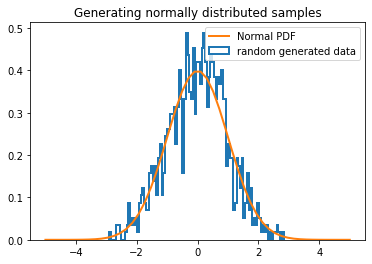

In [30]:
unif_sample = [ np.random.uniform(0,1,1000) for i in range(12)]

normal_sample2 = (np.sum(unif_sample,0) - 6)

plt.hist(normal_sample2, histtype='step', bins=100, density=True, linewidth=2, label = 'random generated data')


plt.plot(x, normal_pdf(x), linewidth=2, label = 'Normal PDF')

plt.legend()
plt.title('Generating normally distributed samples')

plt.show()


A last general approach consists in the so-called Rejection Sampling procedure. We assume that the PDF $f(x)$ can be computed in closed form. The procedure is as follows:

- we identify the max of the PDF: $f_{max}$,
- for each data point $x$ we generate random samples uniformly distributed $\mathbf{U}(0,f_{max})$, 
- we then record the number of random samples with value lower than $f(x)$, the actual PDF at x.

We end up with an histogram associating to each point $x$ the number of elements with relative likelihood approximating $f(x)$.


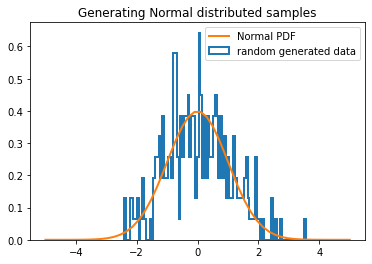

In [33]:
u = np.random.uniform(-5, 5, 1000) 

r = np.random.uniform(0, normal_pdf(0), 1000)

v = u[r < normal_pdf(u)]

plt.hist(v, histtype='step', bins=100, density=True, linewidth=2, label = 'random generated data')
plt.plot(x, normal_pdf(x), linewidth=2, label = 'Normal PDF')

plt.legend()
plt.title('Generating Normal distributed samples')

plt.show()




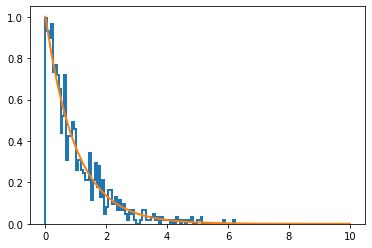

In [61]:
u = np.random.uniform(0, 10, 10000)
r = np.random.uniform(0, l, 10000)

v = u[r<exp_pdf(u,l)]

plt.hist(v, histtype='step', bins=100, density=True, linewidth=2, label = 'random generated data')
x = np.linspace(0,10)
plt.plot(x, exp_pdf(x,l), linewidth=2, label = 'Exponential PDF')


plt.show()